In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


In [ ]:
train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

print("Train Data:")
print(train_data.info())
print(train_data.head())

print("\nTest Data:")
print(test_data.info())
print(test_data.head())

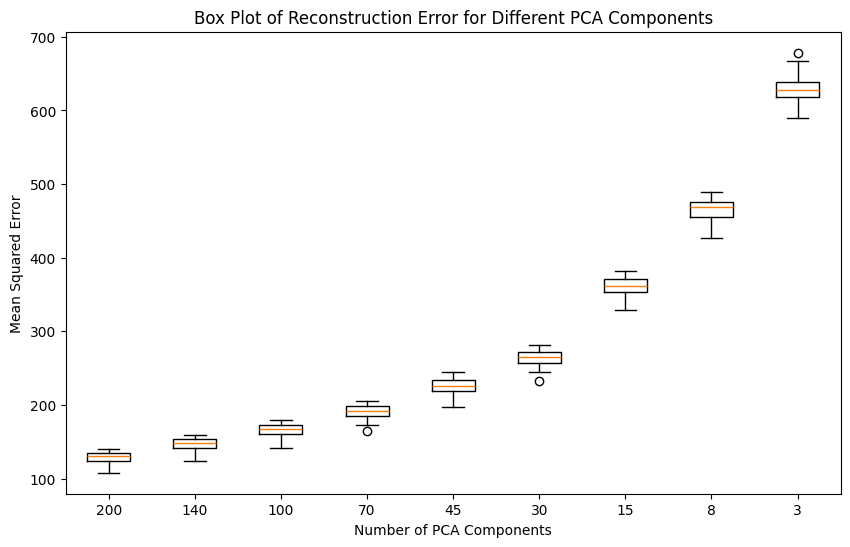

In [15]:
data = train_data


components_list = [200, 140, 100, 70, 45, 30, 15, 8, 3]
num_folds = 5
num_iterations = 10

mse_scores = {}

for n_components in components_list:
    mse_scores[n_components] = []


for iteration in range(num_iterations):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=iteration)

    for train_index, val_index in kf.split(train_data):
        X_train, X_val = train_data.iloc[train_index], train_data.iloc[val_index]


        for n_components in components_list:
            # Perform PCA
            pca = PCA(n_components=n_components)
            X_train_pca = pca.fit_transform(X_train)
            X_val_pca = pca.transform(X_val)

            # Inverse transform to original dimensions
            X_val_reconstructed = pca.inverse_transform(X_val_pca)

            # Calculate Mean Squared Error
            mse = mean_squared_error(X_val, X_val_reconstructed)
            mse_scores[n_components].append(mse)

# Convert mse_scores to a list of lists for box plot plotting
data_for_box_plot = [mse_scores[n_components] for n_components in components_list]

# Plot box plots
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data_for_box_plot, labels=components_list)
ax.set_xlabel('Number of PCA Components')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Box Plot of Reconstruction Error for Different PCA Components')
plt.show()

In [20]:
mse_means = {}

for n_components in components_list:
    mse_means[n_components] = np.mean(mse_scores[n_components])

means_list = [mse_means[n_components] for n_components in components_list]

for n_components, mean_mse in zip(components_list, means_list):
    print(f"Mean MSE for {n_components} components: {mean_mse}")

Mean MSE for 200 components: 128.5079352733392
Mean MSE for 140 components: 146.8566675650874
Mean MSE for 100 components: 166.43332750221217
Mean MSE for 70 components: 190.8107226428015
Mean MSE for 45 components: 226.04563835740436
Mean MSE for 30 components: 264.40207557122665
Mean MSE for 15 components: 361.4444662038735
Mean MSE for 8 components: 464.9845759972058
Mean MSE for 3 components: 628.7653210231673


until 70 dimensions, the MSE is relativley low

but i will use 100 dimensions for PCA on test:

In [21]:
pca = PCA(n_components=100)
train_data_reduced = pca.fit_transform(train_data)
test_data_reduced = pca.transform(test_data)

# Inverse transform the reduced test_data
test_data_reconstructed = pca.inverse_transform(test_data_reduced)

mse = mean_squared_error(test_data, test_data_reconstructed)

print("MSE after PCA with 100 dimensions:", mse)

MSE after PCA with 100 dimensions: 156.64332313247678


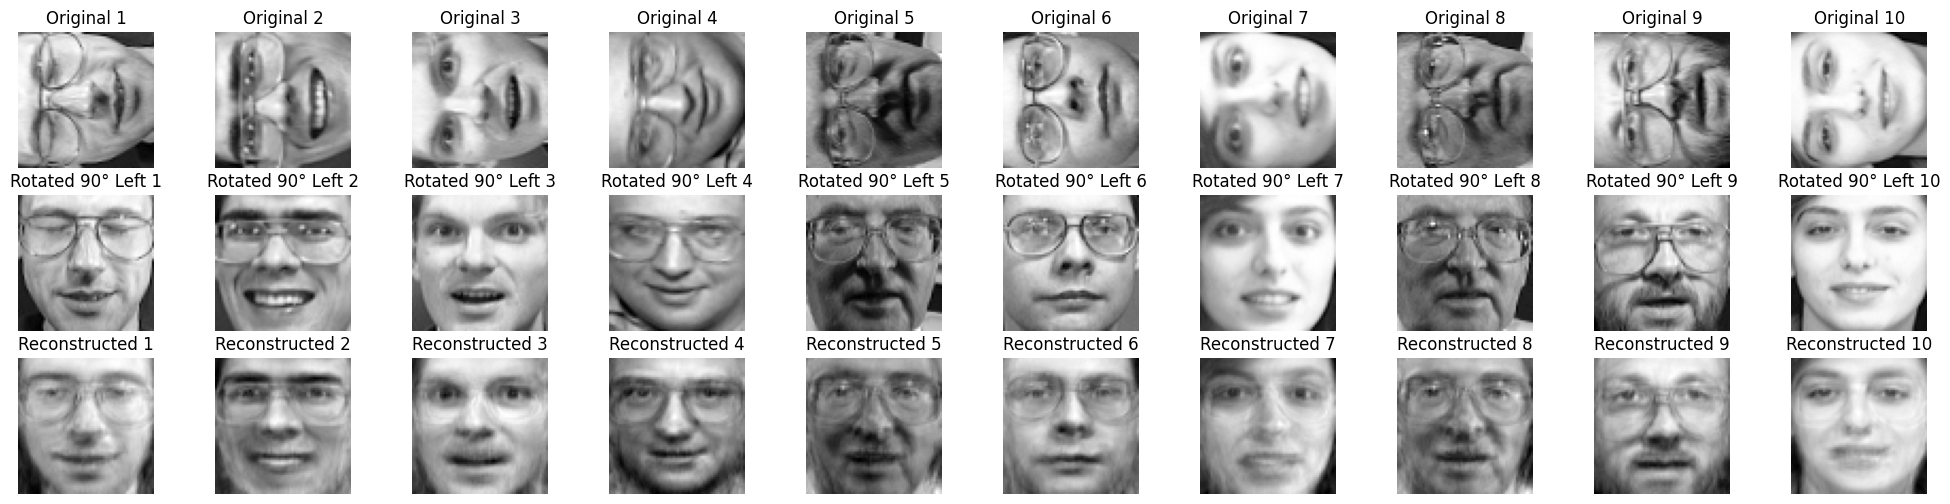

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.ndimage import rotate


num_samples_to_visualize = min(10, test_data.shape[0])
original_images = test_data.iloc[:num_samples_to_visualize, :]


original_images_reduced = pca.transform(original_images)

# Inverse transform the reduced test_data
reconstructed_images = pca.inverse_transform(original_images_reduced)

# Reshape the flattened images back to their original shape (64x64)
original_images_reshaped = original_images.values.reshape((num_samples_to_visualize, 64, 64))
reconstructed_images_reshaped = reconstructed_images.reshape((num_samples_to_visualize, 64, 64))

# Function to rotate images 90 degrees to the left
def rotate_images_90_degrees_left(images):
    return np.array([np.rot90(img, k=3) for img in images])

# Rotate the images 90 degrees to the left
original_images_rotated_left = rotate_images_90_degrees_left(original_images_reshaped)
reconstructed_images_rotated_left = rotate_images_90_degrees_left(reconstructed_images_reshaped)

fig, axes = plt.subplots(3, num_samples_to_visualize, figsize=(25, 6))

for i in range(num_samples_to_visualize):
    axes[0, i].imshow(original_images_reshaped[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Original {i+1}')

    axes[1, i].imshow(original_images_rotated_left[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Rotated 90° Left {i+1}')

    axes[2, i].imshow(reconstructed_images_rotated_left[i], cmap='gray')
    axes[2, i].axis('off')
    axes[2, i].set_title(f'Reconstructed {i+1}')

plt.show()
